In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
outliers_df = pd.read_csv('outliers-data.csv')
outliers_df.drop(columns=["Unnamed: 0"],inplace=True)

In [3]:
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7757 entries, 0 to 7756
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bed             7757 non-null   float64
 1   bath            7757 non-null   float64
 2   acre_lot        7757 non-null   float64
 3   zip_code        7757 non-null   float64
 4   house_size      7757 non-null   float64
 5   prev_sold_date  7757 non-null   object 
 6   price           7757 non-null   float64
dtypes: float64(6), object(1)
memory usage: 424.3+ KB


In [4]:
outliers_df["prev_sold_year"] = pd.to_datetime(outliers_df["prev_sold_date"], format='%Y-%m-%d').dt.year
outliers_df.drop(columns=["prev_sold_date"],inplace=True)
outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7757 entries, 0 to 7756
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bed             7757 non-null   float64
 1   bath            7757 non-null   float64
 2   acre_lot        7757 non-null   float64
 3   zip_code        7757 non-null   float64
 4   house_size      7757 non-null   float64
 5   price           7757 non-null   float64
 6   prev_sold_year  7757 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 424.3 KB


In [5]:
num_features_to_select = 5
random_state_value = 42

In [6]:
X = outliers_df[["bed","bath","acre_lot","zip_code","house_size","prev_sold_year"]]
y = outliers_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_value)

In [7]:
def print_stuff(title, mse,mae,r2):
    print(title + " MSE = {:,.6f}".format(lasso_mse))
    print(title + " MAE = {:,.6f}".format(lasso_mae))
    print(title + " R2 = {:,.6f}".format(lasso_r2))

In [8]:
lasso = linear_model.Lasso(random_state=42)
lasso_sfs = SequentialFeatureSelector(estimator=lasso, n_features_to_select=num_features_to_select)
lasso_sfm = SelectFromModel(estimator=lasso, threshold=1000)
lasso_rfe = RFE(estimator=lasso, n_features_to_select=num_features_to_select)

In [9]:
lasso_pipeline = Pipeline([
  ('regression', lasso)
])

lasso_model = lasso_pipeline["regression"].fit(X_train,y_train)
lasso_predict = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(lasso_predict,y_test)
lasso_mae = mean_absolute_error(lasso_predict,y_test)
lasso_r2 = r2_score(y_test,lasso_predict)

In [10]:
print_stuff("Lasso",lasso_mse,lasso_mae,lasso_r2)

Lasso MSE = 123,732,489,420.844391
Lasso MAE = 226,348.922371
Lasso R2 = 0.379322


In [11]:
lasso_sfm_pipeline = Pipeline([
  ('feature_selection', lasso_sfm),
  ('regression', lasso)
])

lasso_sfm_fs = lasso_sfm_pipeline.named_steps['feature_selection'].fit(X_train,y_train)
lasso_sfm_get_support = lasso_sfm_fs.get_support()

print('The selected features are:', list(X.columns[lasso_sfm_get_support]))

The selected features are: ['bed', 'bath', 'acre_lot', 'prev_sold_year']


In [12]:
lasso_sfm_model = lasso_sfm_pipeline["regression"].fit(X_train,y_train)
lasso_sfm_predict = lasso_sfm_model.predict(X_test)
lasso_sfm_mse = mean_squared_error(lasso_sfm_predict,y_test)
lasso_sfm_mae = mean_absolute_error(lasso_sfm_predict,y_test)
lasso_sfm_r2 = r2_score(y_test,lasso_sfm_predict)
print_stuff("Lasso",lasso_sfm_mse,lasso_sfm_mae,lasso_sfm_r2)

Lasso MSE = 123,732,489,420.844391
Lasso MAE = 226,348.922371
Lasso R2 = 0.379322


In [13]:
lasso_sfs_pipeline = Pipeline([
  ('feature_selection', lasso_sfs),
  ('regression', lasso)
])

lasso_sfs_fs = lasso_sfs_pipeline.named_steps['feature_selection'].fit(X_train,y_train)
lasso_sfs_get_support = lasso_sfs_fs.get_support()

print('The selected features are:', list(X.columns[lasso_sfs_get_support]))

The selected features are: ['bed', 'bath', 'zip_code', 'house_size', 'prev_sold_year']


In [14]:
lasso_sfs_model = lasso_sfs_pipeline["regression"].fit(X_train,y_train)
lasso_sfs_predict = lasso_sfs_model.predict(X_test)
lasso_sfs_mse = mean_squared_error(lasso_sfs_predict,y_test)
lasso_sfs_mae = mean_absolute_error(lasso_sfs_predict,y_test)
lasso_sfs_r2 = r2_score(y_test,lasso_sfs_predict)
print_stuff("Lasso",lasso_sfs_mse,lasso_sfs_mae,lasso_sfs_r2)

Lasso MSE = 123,732,489,420.844391
Lasso MAE = 226,348.922371
Lasso R2 = 0.379322


In [15]:
lasso_rfe_pipeline = Pipeline([
  ('feature_selection', lasso_rfe),
  ('regression', lasso)
])
lasso_rfe_fs = lasso_rfe_pipeline.named_steps['feature_selection'].fit(X_train,y_train)
lasso_rfe_get_support = lasso_rfe_fs.get_support()

print('The selected features are:', list(X.columns[lasso_rfe_get_support]))

The selected features are: ['bed', 'bath', 'acre_lot', 'zip_code', 'prev_sold_year']


In [16]:
lasso_rfe_model = lasso_rfe_pipeline["regression"].fit(X_train,y_train)
lasso_rfe_predict = lasso_rfe_model.predict(X_test)
lasso_rfe_mse = mean_squared_error(lasso_rfe_predict,y_test)
lasso_rfe_mae = mean_absolute_error(lasso_rfe_predict,y_test)
lasso_rfe_r2 = r2_score(y_test,lasso_rfe_predict)
print_stuff("Lasso",lasso_rfe_mse,lasso_rfe_mae,lasso_rfe_r2)

Lasso MSE = 123,732,489,420.844391
Lasso MAE = 226,348.922371
Lasso R2 = 0.379322


https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model

In [17]:
lasso_predict_df = pd.DataFrame(lasso_predict).reset_index()
lasso_predict_df.rename(columns={0: "prediction"},inplace=True)

lasso_sfm_predict_df = pd.DataFrame(lasso_sfm_predict).reset_index()
lasso_sfm_predict_df.rename(columns={0: "prediction"},inplace=True)

lasso_sfs_predict_df = pd.DataFrame(lasso_sfs_predict).reset_index()
lasso_sfs_predict_df.rename(columns={0: "prediction"},inplace=True)

lasso_rfe_predict_df = pd.DataFrame(lasso_rfe_predict).reset_index()
lasso_rfe_predict_df.rename(columns={0: "prediction"},inplace=True)

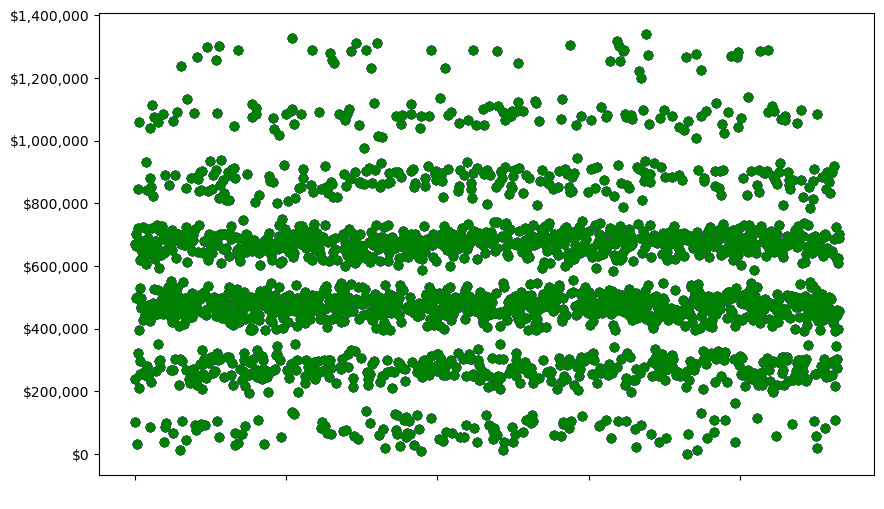

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter('${x:1,.0f}')
ax.xaxis.set_major_formatter(' ')

plt.scatter(lasso_predict_df.index,lasso_predict_df["prediction"], color="black")
plt.scatter(lasso_sfm_predict_df.index,lasso_sfm_predict_df["prediction"], color="brown")
plt.scatter(lasso_sfs_predict_df.index,lasso_sfs_predict_df["prediction"], color="blue")
plt.scatter(lasso_rfe_predict_df.index,lasso_rfe_predict_df["prediction"], color="green")
plt.show()